## Deep Learning - HW 3 - LSTM

### Robert Long
### Fall 2020




### Testing
#### import packages

In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

#### create pandas dataframe of complete dataset - show example

In [2]:
df=pd.read_csv("TSLA.csv")
print("Number of rows and columns:", df.shape)
df.head(5)

Number of rows and columns: (1328, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-09,51.816002,52.590000,51.358002,51.584000,51.584000,16670500
1,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
2,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
3,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
4,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000


#### split into training and testing sets

In [3]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

#### Lag 1

In [4]:
lag = 14
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-(60-(lag-1)):i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

#### Neural Network

In [5]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

layers=4

if layers == 4:
    # Adding a second LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))
    # Adding a third LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))
    # Adding a fourth LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))


# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 1s 42ms/step - loss: 0.0705
Epoch 2/100
24/24 [==============================] - 1s 38ms/step - loss: 0.0195
Epoch 3/100
24/24 [==============================] - 1s 38ms/step - loss: 0.0150
Epoch 4/100
24/24 [==============================] - 1s 38ms/step - loss: 0.0133
Epoch 5/100
24/24 [==============================] - 1s 38ms/step - loss: 0.0126
Epoch 6/100
24/24 [==============================] - 1s 38ms/step - loss: 0.0143
Epoch 7/100
24/24 [==============================] - 1s 37ms/step - loss: 0.0116
Epoch 8/100
24/24 [==============================] - 1s 37ms/step - loss: 0.0121
Epoch 9/100
24/24 [==============================] - 1s 38ms/step - loss: 0.0114
Epoch 10/100
24/24 [==============================] - 1s 37ms/step - loss: 0.0101
Epoch 11/100
24/24 [==============================] - 1s 38ms/step - loss: 0.0104
Epoch 12/100
24/24 [==============================] - 1s 37ms/step - loss: 0.0123
Epoch 13/100
24/24 [=====

#### reshape data

In [6]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-(60-(lag-1)):i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(528, 47, 1)


#### predict

In [7]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#### visualize results

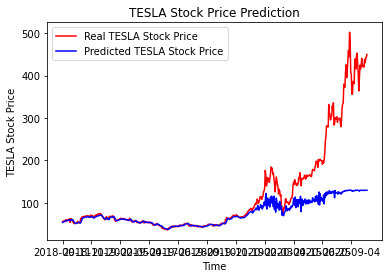

In [8]:
# Visualising the results
plt.plot(df.loc[800:, "Date"],dataset_test.values, color = "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

### Customizable model building

In [19]:
# set with example defaults
def model_1(lag=1, hidden_layers=2, neurons=50, dropout=0.5, batch_size=32, epochs=100, df=df, loss='mean_squared_error'):
    
    training_set = df.iloc[:800, 1:2].values
    test_set = df.iloc[800:, 1:2].values
    
    # Feature Scaling
    sc = MinMaxScaler(feature_range = (0, 1))
    training_set_scaled = sc.fit_transform(training_set)
    
    # Creating a data structure with 60 time-steps and 1 output
    X_train = []
    y_train = []
    for i in range(60, 800):
        X_train.append(training_set_scaled[i-(60-(lag-1)):i, 0])
        y_train.append(training_set_scaled[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    
    
    model = Sequential()
    
    #Adding the first LSTM layer and some Dropout regularisation
    model.add(LSTM(units = neurons, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    model.add(Dropout(dropout))
    
    # Adding hidden_layers-2 LSTM layers with Dropout regularisation
    for i in range(hidden_layers-2):
        model.add(LSTM(units = neurons,return_sequences = True))
        model.add(Dropout(dropout))
      
    model.add(LSTM(units = neurons))
    model.add(Dropout(dropout))
        
    # Adding the output layer
    model.add(Dense(units = 1))
    
    # Compiling the RNN
    model.compile(optimizer = 'adam', loss = loss)

    # Fitting the RNN to the Training set
    model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)
    
    # Getting the predicted stock price of 2017
    dataset_train = df.iloc[:800, 1:2]
    dataset_test = df.iloc[800:, 1:2]
    dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
    inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
    inputs = inputs.reshape(-1,1)
    inputs = sc.transform(inputs)
    X_test = []
    for i in range(60, len(inputs)):
        X_test.append(inputs[i-(60-(lag-1)):i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    predicted_stock_price = model.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)
    
    # Visualising the results
    plt.plot(df.loc[800:, "Date"],dataset_test.values, color = "red", label = "Real TESLA Stock Price")
    plt.plot(df.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
    plt.xticks(np.arange(0,528,120))
    plt.title('TESLA Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('TESLA Stock Price')
    plt.legend()
    plt.show()
    
    return model, X_test

#### Using Defaults

Epoch 1/100
24/24 [==============================] - 1s 53ms/step - loss: 0.0796
Epoch 2/100
24/24 [==============================] - 1s 47ms/step - loss: 0.0285
Epoch 3/100
24/24 [==============================] - 1s 47ms/step - loss: 0.0237
Epoch 4/100
24/24 [==============================] - 1s 47ms/step - loss: 0.0213
Epoch 5/100
24/24 [==============================] - 1s 47ms/step - loss: 0.0189
Epoch 6/100
24/24 [==============================] - 1s 47ms/step - loss: 0.0190
Epoch 7/100
24/24 [==============================] - 1s 47ms/step - loss: 0.0179
Epoch 8/100
24/24 [==============================] - 1s 47ms/step - loss: 0.0175
Epoch 9/100
24/24 [==============================] - 1s 48ms/step - loss: 0.0171
Epoch 10/100
24/24 [==============================] - 1s 47ms/step - loss: 0.0167
Epoch 11/100
24/24 [==============================] - 1s 47ms/step - loss: 0.0169
Epoch 12/100
24/24 [==============================] - 1s 47ms/step - loss: 0.0149
Epoch 13/100
24/24 [=====

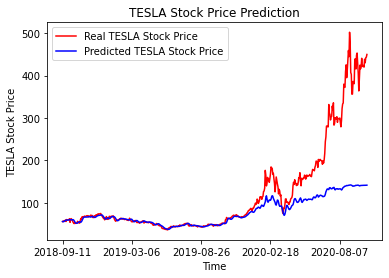

(<tensorflow.python.keras.engine.sequential.Sequential at 0x7fe9d89c1810>,
 array([[[0.86557271],
         [0.87195655],
         [0.91189591],
         ...,
         [0.5830503 ],
         [0.48197407],
         [0.53582684]],
 
        [[0.87195655],
         [0.91189591],
         [0.88275984],
         ...,
         [0.48197407],
         [0.53582684],
         [0.56123915]],
 
        [[0.91189591],
         [0.88275984],
         [0.89896478],
         ...,
         [0.53582684],
         [0.56123915],
         [0.56930064]],
 
        ...,
 
        [[5.61087743],
         [5.63362981],
         [6.12845307],
         ...,
         [8.00847129],
         [8.38842809],
         [8.21839908]],
 
        [[5.63362981],
         [6.12845307],
         [5.96096106],
         ...,
         [8.38842809],
         [8.21839908],
         [8.46126842]],
 
        [[6.12845307],
         [5.96096106],
         [6.28812934],
         ...,
         [8.21839908],
         [8.46126842],
      

In [20]:
'''
model_1(lag=1, hidden_layers=2, neurons=50, dropout=0.5, batch_size=32, epochs=100, 
    df=df, loss='mean_squared_error'):
'''
model_1(lag=1, hidden_layers=4, neurons=50, dropout=0.5, batch_size=32, epochs=100, 
    df=df, loss='mean_squared_error')

#### 6 layers

Epoch 1/100
24/24 [==============================] - 2s 81ms/step - loss: 0.0897
Epoch 2/100
24/24 [==============================] - 2s 73ms/step - loss: 0.0361
Epoch 3/100
24/24 [==============================] - 2s 73ms/step - loss: 0.0224
Epoch 4/100
24/24 [==============================] - 2s 72ms/step - loss: 0.0233
Epoch 5/100
24/24 [==============================] - 2s 71ms/step - loss: 0.0247
Epoch 6/100
24/24 [==============================] - 2s 73ms/step - loss: 0.0257
Epoch 7/100
24/24 [==============================] - 2s 72ms/step - loss: 0.0211
Epoch 8/100
24/24 [==============================] - 2s 72ms/step - loss: 0.0197
Epoch 9/100
24/24 [==============================] - 2s 70ms/step - loss: 0.0200
Epoch 10/100
24/24 [==============================] - 2s 71ms/step - loss: 0.0179
Epoch 11/100
24/24 [==============================] - 2s 71ms/step - loss: 0.0195
Epoch 12/100
24/24 [==============================] - 2s 71ms/step - loss: 0.0207
Epoch 13/100
24/24 [=====

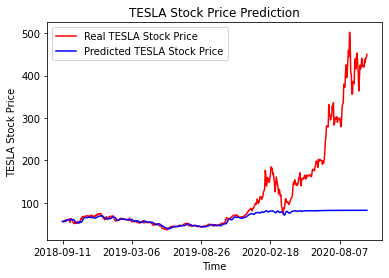

(<tensorflow.python.keras.engine.sequential.Sequential at 0x7fe9ed671dd0>,
 array([[[0.86557271],
         [0.87195655],
         [0.91189591],
         ...,
         [0.5830503 ],
         [0.48197407],
         [0.53582684]],
 
        [[0.87195655],
         [0.91189591],
         [0.88275984],
         ...,
         [0.48197407],
         [0.53582684],
         [0.56123915]],
 
        [[0.91189591],
         [0.88275984],
         [0.89896478],
         ...,
         [0.53582684],
         [0.56123915],
         [0.56930064]],
 
        ...,
 
        [[5.61087743],
         [5.63362981],
         [6.12845307],
         ...,
         [8.00847129],
         [8.38842809],
         [8.21839908]],
 
        [[5.63362981],
         [6.12845307],
         [5.96096106],
         ...,
         [8.38842809],
         [8.21839908],
         [8.46126842]],
 
        [[6.12845307],
         [5.96096106],
         [6.28812934],
         ...,
         [8.21839908],
         [8.46126842],
      

In [21]:
'''
model_1(lag=1, hidden_layers=2, neurons=50, dropout=0.5, batch_size=32, epochs=100, 
    df=df, loss='mean_squared_error'):
'''
model_1(lag=1, hidden_layers=6, neurons=50, dropout=0.5, batch_size=32, epochs=100, 
    df=df, loss='mean_squared_error')

#### 100 neurons

Epoch 1/100
24/24 [==============================] - 2s 67ms/step - loss: 0.0527
Epoch 2/100
24/24 [==============================] - 1s 62ms/step - loss: 0.0200
Epoch 3/100
24/24 [==============================] - 1s 61ms/step - loss: 0.0165
Epoch 4/100
24/24 [==============================] - 1s 62ms/step - loss: 0.0180
Epoch 5/100
24/24 [==============================] - 1s 61ms/step - loss: 0.0155
Epoch 6/100
24/24 [==============================] - 1s 61ms/step - loss: 0.0161
Epoch 7/100
24/24 [==============================] - 1s 61ms/step - loss: 0.0132
Epoch 8/100
24/24 [==============================] - 1s 61ms/step - loss: 0.0133
Epoch 9/100
24/24 [==============================] - 1s 61ms/step - loss: 0.0161
Epoch 10/100
24/24 [==============================] - 1s 61ms/step - loss: 0.0121
Epoch 11/100
24/24 [==============================] - 1s 61ms/step - loss: 0.0124
Epoch 12/100
24/24 [==============================] - 1s 61ms/step - loss: 0.0112
Epoch 13/100
24/24 [=====

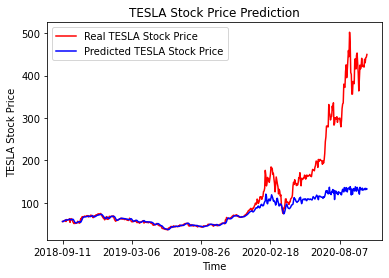

(<tensorflow.python.keras.engine.sequential.Sequential at 0x7fe9c8eafd10>,
 array([[[0.86557271],
         [0.87195655],
         [0.91189591],
         ...,
         [0.5830503 ],
         [0.48197407],
         [0.53582684]],
 
        [[0.87195655],
         [0.91189591],
         [0.88275984],
         ...,
         [0.48197407],
         [0.53582684],
         [0.56123915]],
 
        [[0.91189591],
         [0.88275984],
         [0.89896478],
         ...,
         [0.53582684],
         [0.56123915],
         [0.56930064]],
 
        ...,
 
        [[5.61087743],
         [5.63362981],
         [6.12845307],
         ...,
         [8.00847129],
         [8.38842809],
         [8.21839908]],
 
        [[5.63362981],
         [6.12845307],
         [5.96096106],
         ...,
         [8.38842809],
         [8.21839908],
         [8.46126842]],
 
        [[6.12845307],
         [5.96096106],
         [6.28812934],
         ...,
         [8.21839908],
         [8.46126842],
      

In [22]:
'''
model_1(lag=1, hidden_layers=2, neurons=50, dropout=0.5, batch_size=32, epochs=100, 
    df=df, loss='mean_squared_error'):
'''
model_1(lag=1, hidden_layers=4, neurons=100, dropout=0.5, batch_size=32, epochs=100, 
    df=df, loss='mean_squared_error')

#### Dropout 0.2

Epoch 1/100
24/24 [==============================] - 1s 52ms/step - loss: 0.0547
Epoch 2/100
24/24 [==============================] - 1s 47ms/step - loss: 0.0183
Epoch 3/100
24/24 [==============================] - 1s 47ms/step - loss: 0.0141
Epoch 4/100
24/24 [==============================] - 1s 46ms/step - loss: 0.0143
Epoch 5/100
24/24 [==============================] - 1s 46ms/step - loss: 0.0113
Epoch 6/100
24/24 [==============================] - 1s 46ms/step - loss: 0.0120
Epoch 7/100
24/24 [==============================] - 1s 47ms/step - loss: 0.0117
Epoch 8/100
24/24 [==============================] - 1s 46ms/step - loss: 0.0101
Epoch 9/100
24/24 [==============================] - 1s 47ms/step - loss: 0.0105
Epoch 10/100
24/24 [==============================] - 1s 47ms/step - loss: 0.0108
Epoch 11/100
24/24 [==============================] - 1s 46ms/step - loss: 0.0095
Epoch 12/100
24/24 [==============================] - 1s 46ms/step - loss: 0.0117
Epoch 13/100
24/24 [=====

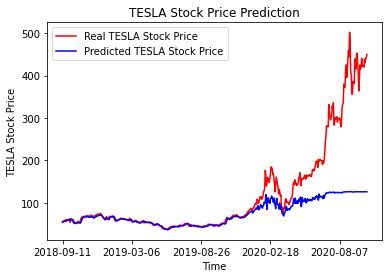

(<tensorflow.python.keras.engine.sequential.Sequential at 0x7fe9b742fb50>,
 array([[[0.86557271],
         [0.87195655],
         [0.91189591],
         ...,
         [0.5830503 ],
         [0.48197407],
         [0.53582684]],
 
        [[0.87195655],
         [0.91189591],
         [0.88275984],
         ...,
         [0.48197407],
         [0.53582684],
         [0.56123915]],
 
        [[0.91189591],
         [0.88275984],
         [0.89896478],
         ...,
         [0.53582684],
         [0.56123915],
         [0.56930064]],
 
        ...,
 
        [[5.61087743],
         [5.63362981],
         [6.12845307],
         ...,
         [8.00847129],
         [8.38842809],
         [8.21839908]],
 
        [[5.63362981],
         [6.12845307],
         [5.96096106],
         ...,
         [8.38842809],
         [8.21839908],
         [8.46126842]],
 
        [[6.12845307],
         [5.96096106],
         [6.28812934],
         ...,
         [8.21839908],
         [8.46126842],
      

In [23]:
'''
model_1(lag=1, hidden_layers=2, neurons=50, dropout=0.5, batch_size=32, epochs=100, 
    df=df, loss='mean_squared_error'):
'''
model_1(lag=1, hidden_layers=4, neurons=50, dropout=0.2, batch_size=32, epochs=100, 
    df=df, loss='mean_squared_error')

#### Batch size 16

Epoch 1/100
47/47 [==============================] - 2s 48ms/step - loss: 0.0534
Epoch 2/100
47/47 [==============================] - 2s 45ms/step - loss: 0.0223
Epoch 3/100
47/47 [==============================] - 2s 47ms/step - loss: 0.0205
Epoch 4/100
47/47 [==============================] - 2s 44ms/step - loss: 0.0206
Epoch 5/100
47/47 [==============================] - 2s 44ms/step - loss: 0.0181
Epoch 6/100
47/47 [==============================] - 2s 45ms/step - loss: 0.0168
Epoch 7/100
47/47 [==============================] - 2s 44ms/step - loss: 0.0166
Epoch 8/100
47/47 [==============================] - 2s 45ms/step - loss: 0.0151
Epoch 9/100
47/47 [==============================] - 2s 44ms/step - loss: 0.0163
Epoch 10/100
47/47 [==============================] - 2s 45ms/step - loss: 0.0142
Epoch 11/100
47/47 [==============================] - 2s 45ms/step - loss: 0.0130
Epoch 12/100
47/47 [==============================] - 2s 45ms/step - loss: 0.0121
Epoch 13/100
47/47 [=====

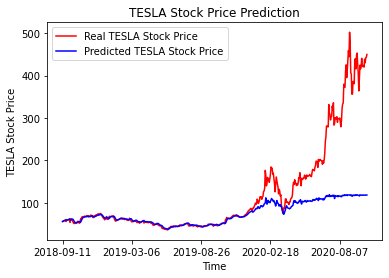

(<tensorflow.python.keras.engine.sequential.Sequential at 0x7fe9ababb190>,
 array([[[0.86557271],
         [0.87195655],
         [0.91189591],
         ...,
         [0.5830503 ],
         [0.48197407],
         [0.53582684]],
 
        [[0.87195655],
         [0.91189591],
         [0.88275984],
         ...,
         [0.48197407],
         [0.53582684],
         [0.56123915]],
 
        [[0.91189591],
         [0.88275984],
         [0.89896478],
         ...,
         [0.53582684],
         [0.56123915],
         [0.56930064]],
 
        ...,
 
        [[5.61087743],
         [5.63362981],
         [6.12845307],
         ...,
         [8.00847129],
         [8.38842809],
         [8.21839908]],
 
        [[5.63362981],
         [6.12845307],
         [5.96096106],
         ...,
         [8.38842809],
         [8.21839908],
         [8.46126842]],
 
        [[6.12845307],
         [5.96096106],
         [6.28812934],
         ...,
         [8.21839908],
         [8.46126842],
      

In [24]:
'''
model_1(lag=1, hidden_layers=2, neurons=50, dropout=0.5, batch_size=32, epochs=100, 
    df=df, loss='mean_squared_error'):
'''
model_1(lag=1, hidden_layers=4, neurons=50, dropout=0.5, batch_size=16, epochs=100, 
    df=df, loss='mean_squared_error')

#### Mean Absolute Error

Epoch 1/100
24/24 [==============================] - 1s 53ms/step - loss: 0.2072
Epoch 2/100
24/24 [==============================] - 1s 47ms/step - loss: 0.1295
Epoch 3/100
24/24 [==============================] - 1s 47ms/step - loss: 0.1135
Epoch 4/100
24/24 [==============================] - 1s 47ms/step - loss: 0.1136
Epoch 5/100
24/24 [==============================] - 1s 47ms/step - loss: 0.1108
Epoch 6/100
24/24 [==============================] - 1s 46ms/step - loss: 0.0990
Epoch 7/100
24/24 [==============================] - 1s 46ms/step - loss: 0.1016
Epoch 8/100
24/24 [==============================] - 1s 46ms/step - loss: 0.0966
Epoch 9/100
24/24 [==============================] - 1s 47ms/step - loss: 0.0993
Epoch 10/100
24/24 [==============================] - 1s 47ms/step - loss: 0.0918
Epoch 11/100
24/24 [==============================] - 1s 46ms/step - loss: 0.0980
Epoch 12/100
24/24 [==============================] - 1s 46ms/step - loss: 0.0959
Epoch 13/100
24/24 [=====

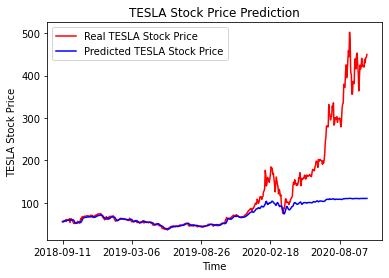

(<tensorflow.python.keras.engine.sequential.Sequential at 0x7fe9c18bb790>,
 array([[[0.86557271],
         [0.87195655],
         [0.91189591],
         ...,
         [0.5830503 ],
         [0.48197407],
         [0.53582684]],
 
        [[0.87195655],
         [0.91189591],
         [0.88275984],
         ...,
         [0.48197407],
         [0.53582684],
         [0.56123915]],
 
        [[0.91189591],
         [0.88275984],
         [0.89896478],
         ...,
         [0.53582684],
         [0.56123915],
         [0.56930064]],
 
        ...,
 
        [[5.61087743],
         [5.63362981],
         [6.12845307],
         ...,
         [8.00847129],
         [8.38842809],
         [8.21839908]],
 
        [[5.63362981],
         [6.12845307],
         [5.96096106],
         ...,
         [8.38842809],
         [8.21839908],
         [8.46126842]],
 
        [[6.12845307],
         [5.96096106],
         [6.28812934],
         ...,
         [8.21839908],
         [8.46126842],
      

In [25]:
'''
model_1(lag=1, hidden_layers=2, neurons=50, dropout=0.5, batch_size=32, epochs=100, 
    df=df, loss='mean_squared_error'):
'''
model_1(lag=1, hidden_layers=4, neurons=50, dropout=0.5, batch_size=32, epochs=100, 
    df=df, loss="mean_absolute_error")

#### Mean Squared Log Error

Epoch 1/100
24/24 [==============================] - 1s 53ms/step - loss: 0.0417
Epoch 2/100
24/24 [==============================] - 1s 47ms/step - loss: 0.0119
Epoch 3/100
24/24 [==============================] - 1s 47ms/step - loss: 0.0084
Epoch 4/100
24/24 [==============================] - 1s 47ms/step - loss: 0.0078
Epoch 5/100
24/24 [==============================] - 1s 47ms/step - loss: 0.0071
Epoch 6/100
24/24 [==============================] - 1s 47ms/step - loss: 0.0075
Epoch 7/100
24/24 [==============================] - 1s 48ms/step - loss: 0.0072
Epoch 8/100
24/24 [==============================] - 1s 48ms/step - loss: 0.0076
Epoch 9/100
24/24 [==============================] - 1s 47ms/step - loss: 0.0066
Epoch 10/100
24/24 [==============================] - 1s 46ms/step - loss: 0.0057
Epoch 11/100
24/24 [==============================] - 1s 47ms/step - loss: 0.0058
Epoch 12/100
24/24 [==============================] - 1s 47ms/step - loss: 0.0062
Epoch 13/100
24/24 [=====

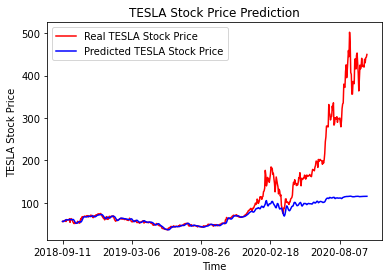

(<tensorflow.python.keras.engine.sequential.Sequential at 0x7fe9a447f7d0>,
 array([[[0.86557271],
         [0.87195655],
         [0.91189591],
         ...,
         [0.5830503 ],
         [0.48197407],
         [0.53582684]],
 
        [[0.87195655],
         [0.91189591],
         [0.88275984],
         ...,
         [0.48197407],
         [0.53582684],
         [0.56123915]],
 
        [[0.91189591],
         [0.88275984],
         [0.89896478],
         ...,
         [0.53582684],
         [0.56123915],
         [0.56930064]],
 
        ...,
 
        [[5.61087743],
         [5.63362981],
         [6.12845307],
         ...,
         [8.00847129],
         [8.38842809],
         [8.21839908]],
 
        [[5.63362981],
         [6.12845307],
         [5.96096106],
         ...,
         [8.38842809],
         [8.21839908],
         [8.46126842]],
 
        [[6.12845307],
         [5.96096106],
         [6.28812934],
         ...,
         [8.21839908],
         [8.46126842],
      

In [26]:
'''
model_1(lag=1, hidden_layers=2, neurons=50, dropout=0.5, batch_size=32, epochs=100, 
    df=df, loss='mean_squared_error'):
'''
model_1(lag=1, hidden_layers=4, neurons=50, dropout=0.5, batch_size=32, epochs=100, 
    df=df, loss="mean_squared_logarithmic_error")

#### 7 day lag

Epoch 1/100
24/24 [==============================] - 1s 48ms/step - loss: 0.0514
Epoch 2/100
24/24 [==============================] - 1s 43ms/step - loss: 0.0239
Epoch 3/100
24/24 [==============================] - 1s 43ms/step - loss: 0.0207
Epoch 4/100
24/24 [==============================] - 1s 43ms/step - loss: 0.0188
Epoch 5/100
24/24 [==============================] - 1s 43ms/step - loss: 0.0177
Epoch 6/100
24/24 [==============================] - 1s 43ms/step - loss: 0.0202
Epoch 7/100
24/24 [==============================] - 1s 43ms/step - loss: 0.0206
Epoch 8/100
24/24 [==============================] - 1s 43ms/step - loss: 0.0175
Epoch 9/100
24/24 [==============================] - 1s 43ms/step - loss: 0.0176
Epoch 10/100
24/24 [==============================] - 1s 42ms/step - loss: 0.0160
Epoch 11/100
24/24 [==============================] - 1s 42ms/step - loss: 0.0135
Epoch 12/100
24/24 [==============================] - 1s 42ms/step - loss: 0.0160
Epoch 13/100
24/24 [=====

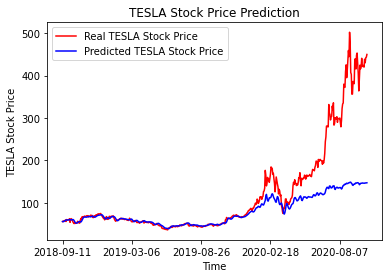

(<tensorflow.python.keras.engine.sequential.Sequential at 0x7fe9c18bbdd0>,
 array([[[0.76850686],
         [0.79277328],
         [0.82939809],
         ...,
         [0.5830503 ],
         [0.48197407],
         [0.53582684]],
 
        [[0.79277328],
         [0.82939809],
         [0.84437542],
         ...,
         [0.48197407],
         [0.53582684],
         [0.56123915]],
 
        [[0.82939809],
         [0.84437542],
         [0.86348575],
         ...,
         [0.53582684],
         [0.56123915],
         [0.56930064]],
 
        ...,
 
        [[5.28984778],
         [5.57220627],
         [5.5599303 ],
         ...,
         [8.00847129],
         [8.38842809],
         [8.21839908]],
 
        [[5.57220627],
         [5.5599303 ],
         [5.50673215],
         ...,
         [8.38842809],
         [8.21839908],
         [8.46126842]],
 
        [[5.5599303 ],
         [5.50673215],
         [5.61722023],
         ...,
         [8.21839908],
         [8.46126842],
      

In [27]:
'''
model_1(lag=1, hidden_layers=2, neurons=50, dropout=0.5, batch_size=32, epochs=100, 
    df=df, loss='mean_squared_error'):
'''
model_1(lag=7, hidden_layers=4, neurons=50, dropout=0.5, batch_size=32, epochs=100, 
    df=df, loss='mean_squared_error')

#### 14 day lag

Epoch 1/100
24/24 [==============================] - 1s 43ms/step - loss: 0.0670
Epoch 2/100
24/24 [==============================] - 1s 39ms/step - loss: 0.0266
Epoch 3/100
24/24 [==============================] - 1s 40ms/step - loss: 0.0223
Epoch 4/100
24/24 [==============================] - 1s 39ms/step - loss: 0.0206
Epoch 5/100
24/24 [==============================] - 1s 39ms/step - loss: 0.0179
Epoch 6/100
24/24 [==============================] - 1s 38ms/step - loss: 0.0196
Epoch 7/100
24/24 [==============================] - 1s 38ms/step - loss: 0.0174
Epoch 8/100
24/24 [==============================] - 1s 38ms/step - loss: 0.0186
Epoch 9/100
24/24 [==============================] - 1s 38ms/step - loss: 0.0196
Epoch 10/100
24/24 [==============================] - 1s 38ms/step - loss: 0.0172
Epoch 11/100
24/24 [==============================] - 1s 38ms/step - loss: 0.0151
Epoch 12/100
24/24 [==============================] - 1s 39ms/step - loss: 0.0155
Epoch 13/100
24/24 [=====

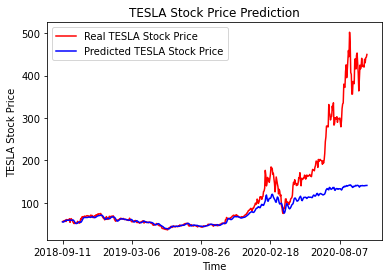

In [33]:
'''
model_1(lag=1, hidden_layers=2, neurons=50, dropout=0.5, batch_size=32, epochs=100, 
    df=df, loss='mean_squared_error'):
'''
model_14, X_test = model_1(lag=14, hidden_layers=4, neurons=50, dropout=0.5, batch_size=32, epochs=100, 
                           df=df, loss='mean_squared_error')

### Prediction for 10/28/2020

#### Using the 14-day lag 

In [34]:
# Getting the predicted stock price of 2020-2021
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
X_pred = []
for i in range(60, len(inputs)):
    X_pred.append(inputs[i-(60):i, 0])
X_pred = np.array(X_pred)
X_pred = np.reshape(X_pred, (X_pred.shape[0], X_pred.shape[1], 1))
print(X_pred.shape)

(528, 60, 1)


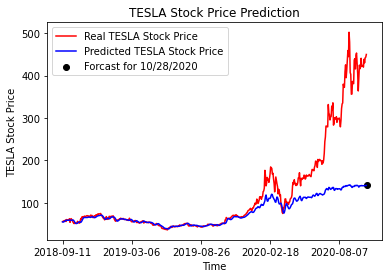

In [35]:
prediction = sc.inverse_transform(model_14.predict(X_pred))
predicted_stock_price = model_14.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

dates=df.loc[800:, "Date"]

# Visualising the results
plt.plot(dates,dataset_test.values, color = "red", label = "Real TESLA Stock Price")
plt.plot(dates,predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.scatter("2020-10-28", prediction[-1], color = "black", label = r"Forcast for 10/28/2020" )
plt.xticks(np.arange(0,528,120))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [36]:
predicted_stock_price[-1]

array([141.06554], dtype=float32)

In [37]:
prediction[-1]

array([141.06549], dtype=float32)